In [1]:
#Dependencies
!pip install gmplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from gmplot import gmplot
import gmaps
# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Name of the csv file
crime_csv_path = 'dc-crimes-search-results.csv'

In [3]:
# Import the data into a Pandas DataFrame
crime_df = pd.read_csv(crime_csv_path)
crime_df.head()

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 15,600.0,property,-77.069766,2015-05-05T17:45:00.000,theft f/auto,evening,140519.000000,2.0,3.0,...,393951.000000,3500 - 3599 block of lowell street nw,2015-05-05T15:00:00.000,15064669,theft f/auto,3C,2015-05-05T22:06:00.000Z,others,"38.932540365033717,-77.069768169731375",38.932533
1,cluster 2,3000.0,violent,-77.031208,2015-05-05T20:55:00.000,robbery,evening,140084.000000,3.0,1.0,...,397294.000000,1300 - 1399 block of irving street nw,2015-05-05T20:50:00.000,15064781,robbery,1A,2015-05-06T01:05:00.000Z,gun,"38.928638407177509,-77.031210110921407",38.928631
2,cluster 3,4400.0,property,-77.028460,2015-05-05T22:14:00.000,motor vehicle theft,evening,139201.000000,3.0,1.0,...,397532.000000,1200 - 1247 block of florida avenue nw,2015-05-05T18:18:00.000,15064796,motor vehicle theft,1B,2015-05-06T02:58:00.000Z,others,"38.920684762113531,-77.028462123394547",38.920677
3,cluster 23,8804.0,violent,-76.985496,2015-06-23T08:00:00.000,homicide,midnight,137689.000000,5.0,5.0,...,401258.000000,1200 - 1299 block of holbrook terrace ne,2015-06-23T05:23:00.000,15094190,homicide,5D,2015-06-24T04:00:00.000Z,gun,"38.907066722563066,-76.985498377563218",38.907059
4,cluster 25,8100.0,property,-76.990245,2015-06-23T06:30:00.000,theft f/auto,day,136398.650012,1.0,6.0,...,400846.210015,duncan place ne and 12th street ne,2015-06-22T22:00:00.000,15094194,theft f/auto,6A,2015-06-23T12:48:00.000Z,others,"38.895443280295112,-76.990247632314322",38.895435


In [4]:
# Delete extraneous column
crime_df.count()

NEIGHBORHOOD_CLUSTER    279042
CENSUS_TRACT            281769
offensegroup            282611
LONGITUDE               282611
END_DATE                271780
offense-text            282611
SHIFT                   282611
YBLOCK                  282611
DISTRICT                282449
WARD                    282599
YEAR                    282611
offensekey              282611
BID                      46291
sector                  282432
PSA                     282432
ucr-rank                282611
BLOCK_GROUP             281769
VOTING_PRECINCT         282551
XBLOCK                  282611
BLOCK                   282611
START_DATE              282603
CCN                     282611
OFFENSE                 282611
ANC                     282611
REPORT_DAT              282611
METHOD                  282611
location                282611
LATITUDE                282611
dtype: int64

In [5]:
# drop all rows with missing information
no_null_crime_df = crime_df.dropna(how='any')

In [6]:
#Verify dropped rows
no_null_crime_df.count()

NEIGHBORHOOD_CLUSTER    43496
CENSUS_TRACT            43496
offensegroup            43496
LONGITUDE               43496
END_DATE                43496
offense-text            43496
SHIFT                   43496
YBLOCK                  43496
DISTRICT                43496
WARD                    43496
YEAR                    43496
offensekey              43496
BID                     43496
sector                  43496
PSA                     43496
ucr-rank                43496
BLOCK_GROUP             43496
VOTING_PRECINCT         43496
XBLOCK                  43496
BLOCK                   43496
START_DATE              43496
CCN                     43496
OFFENSE                 43496
ANC                     43496
REPORT_DAT              43496
METHOD                  43496
location                43496
LATITUDE                43496
dtype: int64

In [7]:
# Verify the data types
no_null_crime_df.dtypes


NEIGHBORHOOD_CLUSTER     object
CENSUS_TRACT            float64
offensegroup             object
LONGITUDE               float64
END_DATE                 object
offense-text             object
SHIFT                    object
YBLOCK                  float64
DISTRICT                float64
WARD                    float64
YEAR                      int64
offensekey               object
BID                      object
sector                   object
PSA                     float64
ucr-rank                  int64
BLOCK_GROUP              object
VOTING_PRECINCT          object
XBLOCK                  float64
BLOCK                    object
START_DATE               object
CCN                       int64
OFFENSE                  object
ANC                      object
REPORT_DAT               object
METHOD                   object
location                 object
LATITUDE                float64
dtype: object

In [8]:
# Check to see if there are any values with mispelled or similar values in "Offense Type"
no_null_crime_df["OFFENSE"].value_counts()

theft/other                   25727
theft f/auto                  10021
robbery                        2778
motor vehicle theft            1679
assault w/dangerous weapon     1527
burglary                       1465
sex abuse                       242
homicide                         47
arson                            10
Name: OFFENSE, dtype: int64

In [9]:
#Clean up Neighborhood Cluster and replace it with actual name areas
no_null_crime_df=no_null_crime_df.rename(index=str , columns={"NEIGHBORHOOD_CLUSTER":"NEIGHBORHOOD"})



In [10]:
print(no_null_crime_df.head())
# replace the clusters with actual names continued
no_null_crime_df['NEIGHBORHOOD']= no_null_crime_df['NEIGHBORHOOD'].replace(
    {'cluster 15':'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace',
     'cluster 2':'Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View',
     'cluster 3':'Howard University, Le Droit Park, Cardozo/Shaw',
     'cluster 4':'Georgetown, Burleith/Hillandale',
     'cluster 5':'West End, Foggy Bottom, GWU',
     'cluster 6':'Dupont Circle, Connecticut Avenue/K Street',
     'cluster 1':'Kalorama Heights, Adams Morgan, Lanier Heights',
     'cluster 7':'Shaw, Logan Circle',
     'cluster 8': 'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street',
     'cluster 9': 'Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point',
     'cluster 10': 'Hawthorne, Barnaby Woods, Chevy Chase',
     'cluster 11':'Friendship Heights, American University Park, Tenleytown',
     'cluster 12':'North Cleveland Park, Forest Hills, Van Ness',
     'cluster 13':'Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir',
     'cluster 14':'Cathedral Heights, McLean Gardens, Glover Park',
     'cluster 16': 'Colonial Village, Shepherd Park, North Portal Estates',
     'cluster 17': 'Takoma, Brightwood, Manor Park',
     'cluster 18': 'Brightwood Park, Crestwood, Petworth',
     'cluster 19':'Lamond Riggs, Queens Chapel, Fort Totten, Pleasant Hill',
     'cluster 20': 'North Michigan Park, Michigan Park, University Heights',
     'cluster 21': 'Edgewood, Bloomingdale, Truxton Circle, Eckington',
     'cluster 22':'Brookland, Brentwood, Langdon',
     'cluster 23':'Ivy City, Arboretum, Trinidad, Carver Langston',
     'cluster 24':'Woodridge, Fort Lincoln, Gateway',
     'cluster 25': 'NoMa, Union Station, Stanton Park, Kingman Park',
     'cluster 26':'Capitol Hill, Lincoln Park',
     'cluster 27':'Near Southeast, Navy Yard',
     'cluster 28': 'Historic Anacostia',
     'cluster 29': 'Eastland Gardens, Kenilworth',
     'cluster 30': 'Mayfair, Hillbrook, Mahaning Heights',
     'cluster 31': 'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights',
     'cluster 32': 'River Terrace, Benning, Greenway, Fort Dupont',
     'cluster 33': 'Capitol View, Marshall Heights, Benning Heights',
     'cluster 34': 'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Dupont Park',
     'cluster 35': 'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park',
     'cluster 36': 'Woodland/Fort Stanton, Garfield Heights, Knox Hill',
     'cluster 37': 'Sheridan, Barry Farm, Buena Vista',
     'cluster 38': 'Douglass, Shipley Terrace',
     'cluster 39':'Congress Heights, Bellevue, Washington Highlands'})

   NEIGHBORHOOD  CENSUS_TRACT offensegroup  LONGITUDE  \
8     cluster 9       10500.0     property -77.010660   
20    cluster 8        5800.0      violent -77.022431   
35    cluster 1        4002.0     property -77.041859   
43    cluster 4         100.0     property -77.060134   
45    cluster 1        4001.0      violent -77.043463   

                   END_DATE offense-text    SHIFT     YBLOCK  DISTRICT  WARD  \
8   2015-06-29T21:48:00.000  theft/other  evening  134351.00       1.0   6.0   
20  2015-06-10T13:50:00.000      robbery      day  136884.96       1.0   2.0   
35  2015-12-20T12:05:43.000  theft/other      day  139140.00       3.0   1.0   
43  2015-12-27T15:46:25.000  theft/other  evening  137339.00       2.0   2.0   
45  2015-11-01T03:00:24.000    sex abuse  evening  139315.00       3.0   1.0   

      ...         XBLOCK                                            BLOCK  \
8     ...      399075.00              1100 - 1199 block of half street sw   
20    ...      398054.

In [11]:
#Verify if name was replaced
no_null_crime_df.head()

,NEIGHBORHOOD,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
8,"Southwest Employment Area, Southwest/Waterfron...",10500.0,property,-77.010660,2015-06-29T21:48:00.000,theft/other,evening,134351.00,1.0,6.0,...,399075.00,1100 - 1199 block of half street sw,2015-06-29T21:47:00.000,15098137,theft/other,6D,2015-06-30T02:05:00.000Z,others,"38.876997186422173,-77.010662425191853",38.876989
20,"Downtown, Chinatown, Penn Quarters, Mount Vern...",5800.0,violent,-77.022431,2015-06-10T13:50:00.000,robbery,day,136884.96,1.0,2.0,...,398054.21,700 - 799 block of h street nw,2015-06-10T13:00:00.000,15086313,robbery,2C,2015-06-10T17:50:00.000Z,others,"38.899822390384138,-77.022433674780757",38.899815
35,"Kalorama Heights, Adams Morgan, Lanier Heights",4002.0,property,-77.041859,2015-12-20T12:05:43.000,theft/other,day,139140.00,3.0,1.0,...,396370.00,2300 - 2399 block of 18th street nw,2015-12-19T22:00:27.000,15202729,theft/other,1C,2015-12-20T17:06:13.000Z,others,"38.920131222124674,-77.041861447715945",38.920123
43,"Georgetown, Burleith/Hillandale",100.0,property,-77.060134,2015-12-27T15:46:25.000,theft/other,evening,137339.00,2.0,2.0,...,394784.00,1000 - 1099 block of thomas jefferson street nw,2015-12-27T15:42:52.000,15206326,theft/other,2E,2015-12-27T21:37:01.000Z,others,"38.903899221017866,-77.06013664112929",38.903891
45,"Kalorama Heights, Adams Morgan, Lanier Heights",4001.0,violent,-77.043463,2015-11-01T03:00:24.000,sex abuse,evening,139315.00,3.0,1.0,...,396231.00,1811 - 1852 block of columbia road nw,2015-10-31T22:30:59.000,15206372,sex abuse,1C,2015-12-27T23:46:49.000Z,others,"38.921707093772405,-77.043465279886618",38.921699


In [12]:
#Select a data frame for arson
crime_arson_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "arson", :]
crime_arson_df


#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_arson_df = crime_arson_df.groupby(['NEIGHBORHOOD']).size().sort_values(ascending=False)

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_crime_arson_df)

# Number of clusters/neighborhood which were exposed to arson
grouped_crime_arson_df.count()




NEIGHBORHOOD
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street    3
Edgewood, Bloomingdale, Truxton Circle, Eckington                                2
NoMa, Union Station, Stanton Park, Kingman Park                                  1
Kalorama Heights, Adams Morgan, Lanier Heights                                   1
Georgetown, Burleith/Hillandale                                                  1
Dupont Circle, Connecticut Avenue/K Street                                       1
Capitol Hill, Lincoln Park                                                       1
dtype: int64


7

In [13]:
#Select a data frame for homicide
crime_homicide_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "homicide",:]
crime_homicide_df


#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_homicide_df = crime_homicide_df.groupby(['NEIGHBORHOOD']).size().sort_values(ascending=False)

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_crime_homicide_df)

# Number of clusters/neighborhood which were exposed to homicide
grouped_crime_homicide_df.count()
crime_homicide_df.head()

NEIGHBORHOOD
Near Southeast, Navy Yard                                                        15
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street     7
Kalorama Heights, Adams Morgan, Lanier Heights                                    4
Historic Anacostia                                                                4
Capitol Hill, Lincoln Park                                                        4
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point       3
Edgewood, Bloomingdale, Truxton Circle, Eckington                                 3
Dupont Circle, Connecticut Avenue/K Street                                        3
NoMa, Union Station, Stanton Park, Kingman Park                                   2
Georgetown, Burleith/Hillandale                                                   2
dtype: int64


,NEIGHBORHOOD,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
25576,"Kalorama Heights, Adams Morgan, Lanier Heights",4002.0,violent,-77.041686,2013-08-30T01:55:00.000,homicide,midnight,139037.0,3.0,1.0,...,396385.0,2200 - 2299 block of 18th street nw,2013-08-30T01:50:00.000,13123466,homicide,1C,2013-09-20T04:00:00.000Z,others,"38.919203426272581,-77.041687933570799",38.919196
26970,"Near Southeast, Navy Yard",7200.0,violent,-76.997764,2013-09-16T10:23:00.000,homicide,midnight,134008.0,1.0,6.0,...,400194.0,1300 - 1399 block of isaac hull avenue se,2013-09-16T08:23:00.000,13132784,homicide,6D,2013-09-16T04:00:00.000Z,gun,"38.873907771147749,-76.997766629820617",38.873900
26971,"Near Southeast, Navy Yard",7200.0,violent,-76.997764,2013-09-16T10:23:00.000,homicide,midnight,134008.0,1.0,6.0,...,400194.0,1300 - 1399 block of isaac hull avenue se,2013-09-16T08:23:00.000,13132784,homicide,6D,2013-09-16T04:00:00.000Z,gun,"38.873907771147749,-76.997766629820617",38.873900
31848,"Capitol Hill, Lincoln Park",7100.0,violent,-76.990250,2013-06-24T01:25:00.000,homicide,midnight,134715.0,1.0,6.0,...,400846.0,700 - 799 block of 12th street se,2013-06-24T01:25:00.000,13086368,homicide,6B,2013-06-25T04:00:00.000Z,gun,"38.8802763221831,-76.990252125067812",38.880269
40701,"Near Southeast, Navy Yard",7200.0,violent,-76.997856,2016-11-27T14:53:59.000,homicide,midnight,134410.0,1.0,6.0,...,400186.0,500 - 699 block of l street se,2016-11-27T12:44:46.000,16201289,homicide,6D,2016-11-27T05:00:00.000Z,gun,"38.877529149132585,-76.997858713101252",38.877521


In [14]:
# Select a dataframe for sex abuse
crime_sexabuse_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "sex abuse", :]
crime_sexabuse_df


#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_sexabuse_df = crime_sexabuse_df.groupby(['NEIGHBORHOOD']).size().sort_values(ascending=False)

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_crime_sexabuse_df)

# Number of clusters/neighborhood which were exposed to sex abuse
grouped_crime_sexabuse_df.count()

NEIGHBORHOOD
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street     97
Dupont Circle, Connecticut Avenue/K Street                                        34
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point       22
Georgetown, Burleith/Hillandale                                                   20
Kalorama Heights, Adams Morgan, Lanier Heights                                    18
Capitol Hill, Lincoln Park                                                        14
Near Southeast, Navy Yard                                                         10
NoMa, Union Station, Stanton Park, Kingman Park                                    8
Historic Anacostia                                                                 7
Edgewood, Bloomingdale, Truxton Circle, Eckington                                  6
Sheridan, Barry Farm, Buena Vista                                                  4
Twining, Fairlawn, Randle Highlands, Penn Branch, Fo

12

In [15]:
# Select a dataframe for burglary
crime_burglary_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "burglary", :]
crime_burglary_df


#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_burglary_df = crime_burglary_df.groupby(['NEIGHBORHOOD']).size().sort_values(ascending=False)

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_crime_burglary_df)

# Number of clusters/neighborhood which were exposed to burglary
grouped_crime_burglary_df.count()

NEIGHBORHOOD
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street     322
Dupont Circle, Connecticut Avenue/K Street                                        195
Capitol Hill, Lincoln Park                                                        184
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point       149
Georgetown, Burleith/Hillandale                                                   149
Kalorama Heights, Adams Morgan, Lanier Heights                                    110
NoMa, Union Station, Stanton Park, Kingman Park                                    90
Near Southeast, Navy Yard                                                          69
Historic Anacostia                                                                 67
Sheridan, Barry Farm, Buena Vista                                                  61
Edgewood, Bloomingdale, Truxton Circle, Eckington                                  55
Twining, Fairlawn, Randle Highlands, Penn

14

In [16]:
# Select a dataframe for assault
crime_assault_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "assault w/dangerous weapon", :]
crime_assault_df


#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_assault_df = crime_assault_df.groupby(['NEIGHBORHOOD']).size().sort_values(ascending=False)

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_crime_assault_df)

# Number of clusters/neighborhood which were exposed to assault
grouped_crime_assault_df.count()

NEIGHBORHOOD
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street     541
Dupont Circle, Connecticut Avenue/K Street                                        211
Kalorama Heights, Adams Morgan, Lanier Heights                                    140
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point       120
Sheridan, Barry Farm, Buena Vista                                                  88
Georgetown, Burleith/Hillandale                                                    78
Edgewood, Bloomingdale, Truxton Circle, Eckington                                  77
NoMa, Union Station, Stanton Park, Kingman Park                                    72
Capitol Hill, Lincoln Park                                                         64
Historic Anacostia                                                                 59
Near Southeast, Navy Yard                                                          50
Twining, Fairlawn, Randle Highlands, Penn

14

In [17]:
# Select a dataframe for motor vehicle theft
crime_vehicletheft_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "motor vehicle theft", :]
crime_vehicletheft_df


#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_vehicletheft_df = crime_vehicletheft_df.groupby(['NEIGHBORHOOD']).size().sort_values(ascending=False)

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_crime_vehicletheft_df)

# Number of clusters/neighborhood which were exposed to motor vehicle theft
grouped_crime_vehicletheft_df.count()

NEIGHBORHOOD
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street     493
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point       216
Dupont Circle, Connecticut Avenue/K Street                                        197
NoMa, Union Station, Stanton Park, Kingman Park                                   165
Near Southeast, Navy Yard                                                         135
Capitol Hill, Lincoln Park                                                        131
Kalorama Heights, Adams Morgan, Lanier Heights                                    124
Sheridan, Barry Farm, Buena Vista                                                  62
Georgetown, Burleith/Hillandale                                                    59
Edgewood, Bloomingdale, Truxton Circle, Eckington                                  43
Historic Anacostia                                                                 31
Shaw, Logan Circle                       

14

In [18]:
# Select a dataframe for theft f/auto
crime_theftauto_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "theft f/auto", :]
crime_theftauto_df


#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_theftauto_df = crime_theftauto_df.groupby(['NEIGHBORHOOD']).size().sort_values(ascending=False)

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_crime_theftauto_df)

# Number of clusters/neighborhood which were exposed to theft f/auto
grouped_crime_theftauto_df.count()

NEIGHBORHOOD
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street     3754
Dupont Circle, Connecticut Avenue/K Street                                        1232
Capitol Hill, Lincoln Park                                                        1085
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point        994
NoMa, Union Station, Stanton Park, Kingman Park                                    950
Kalorama Heights, Adams Morgan, Lanier Heights                                     581
Near Southeast, Navy Yard                                                          510
Georgetown, Burleith/Hillandale                                                    457
Edgewood, Bloomingdale, Truxton Circle, Eckington                                  182
Historic Anacostia                                                                 108
Shaw, Logan Circle                                                                  81
Sheridan, Barry Farm, Buena Vi

15

In [19]:
# Select a dataframe for robbery
crime_robbery_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "robbery", :]
crime_robbery_df


#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_robbery_df = crime_robbery_df.groupby(['NEIGHBORHOOD'], as_index= False).size().sort_values(ascending=False)

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_crime_robbery_df)

# Number of clusters/neighborhood which were exposed to robbery
grouped_crime_robbery_df.count()

NEIGHBORHOOD
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street     917
Capitol Hill, Lincoln Park                                                        290
Kalorama Heights, Adams Morgan, Lanier Heights                                    266
NoMa, Union Station, Stanton Park, Kingman Park                                   256
Dupont Circle, Connecticut Avenue/K Street                                        243
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point       189
Historic Anacostia                                                                139
Georgetown, Burleith/Hillandale                                                   124
Sheridan, Barry Farm, Buena Vista                                                 116
Edgewood, Bloomingdale, Truxton Circle, Eckington                                 113
Near Southeast, Navy Yard                                                          97
Twining, Fairlawn, Randle Highlands, Penn

16

In [20]:
# Select a dataframe for theftother
crime_theftother_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "theft/other", :]
crime_theftother_df


#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_theftother_df = crime_theftother_df.groupby(['NEIGHBORHOOD']).size().sort_values(ascending=False)

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_crime_theftother_df)

# Number of clusters/neighborhood which were exposed to theftother
grouped_crime_theftother_df.count()

NEIGHBORHOOD
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street     10240
Dupont Circle, Connecticut Avenue/K Street                                         3918
Georgetown, Burleith/Hillandale                                                    3881
Capitol Hill, Lincoln Park                                                         2085
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point        1468
NoMa, Union Station, Stanton Park, Kingman Park                                    1248
Kalorama Heights, Adams Morgan, Lanier Heights                                     1248
Near Southeast, Navy Yard                                                           875
Historic Anacostia                                                                  279
Edgewood, Bloomingdale, Truxton Circle, Eckington                                   187
Sheridan, Barry Farm, Buena Vista                                                   142
West End, Foggy Bot

14

In [21]:
crime_robbery_df.columns

Index(['NEIGHBORHOOD', 'CENSUS_TRACT', 'offensegroup', 'LONGITUDE', 'END_DATE',
       'offense-text', 'SHIFT', 'YBLOCK', 'DISTRICT', 'WARD', 'YEAR',
       'offensekey', 'BID', 'sector', 'PSA', 'ucr-rank', 'BLOCK_GROUP',
       'VOTING_PRECINCT', 'XBLOCK', 'BLOCK', 'START_DATE', 'CCN', 'OFFENSE',
       'ANC', 'REPORT_DAT', 'METHOD', 'location', 'LATITUDE'],
      dtype='object')

<function matplotlib.pyplot.show>

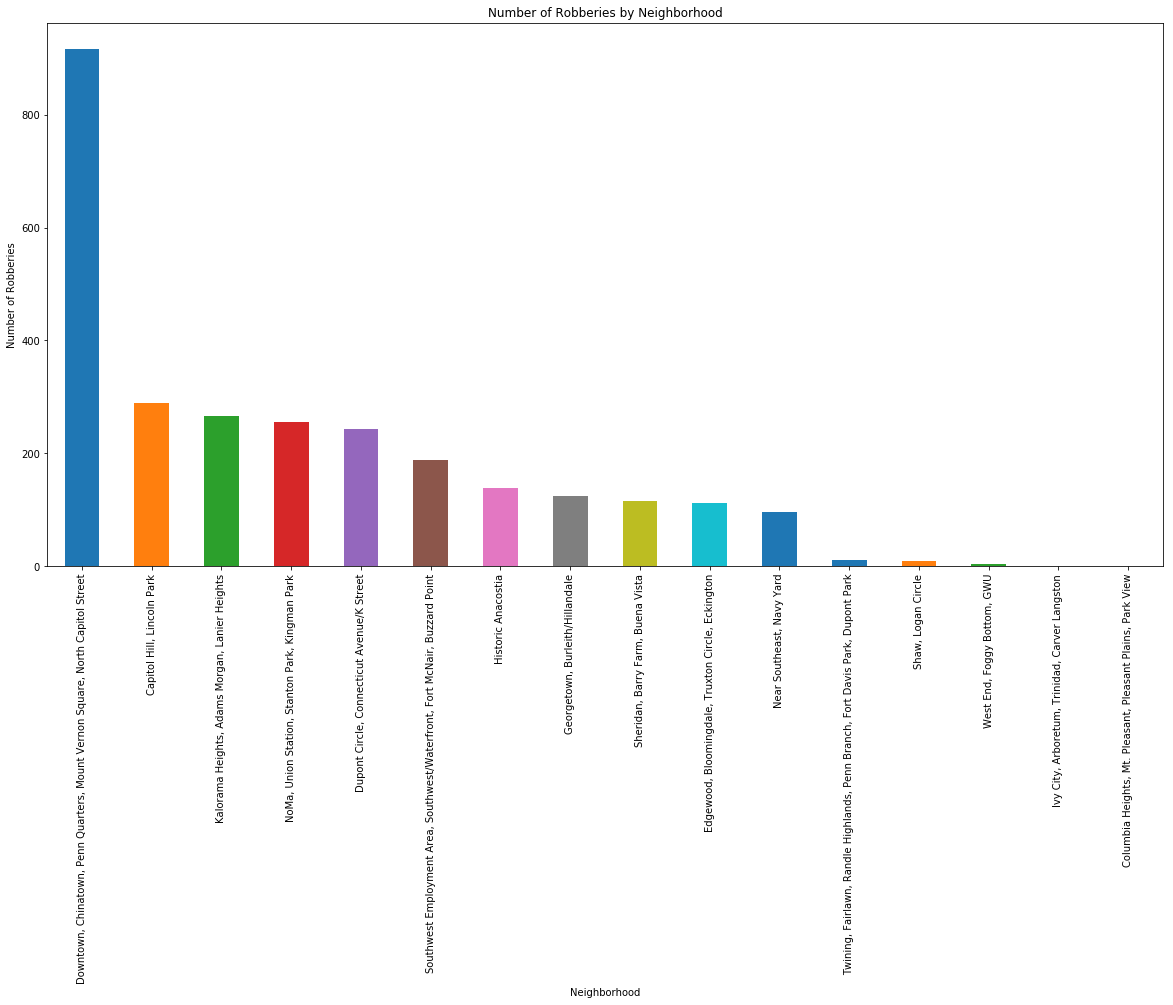

In [22]:
# Display a bar chart for the neighborhoods by offense type(robbery)
width=0.50
plt.rcParams['figure.figsize']=(20,10)
robbery=grouped_crime_robbery_df.plot(kind="bar", title="Number of Robberies by Neighborhood")
robbery.set_xlabel("Neighborhood")
robbery.set_ylabel("Number of Robberies")
robbery.plot(figsize=(100,50))
plt.show

<function matplotlib.pyplot.show>

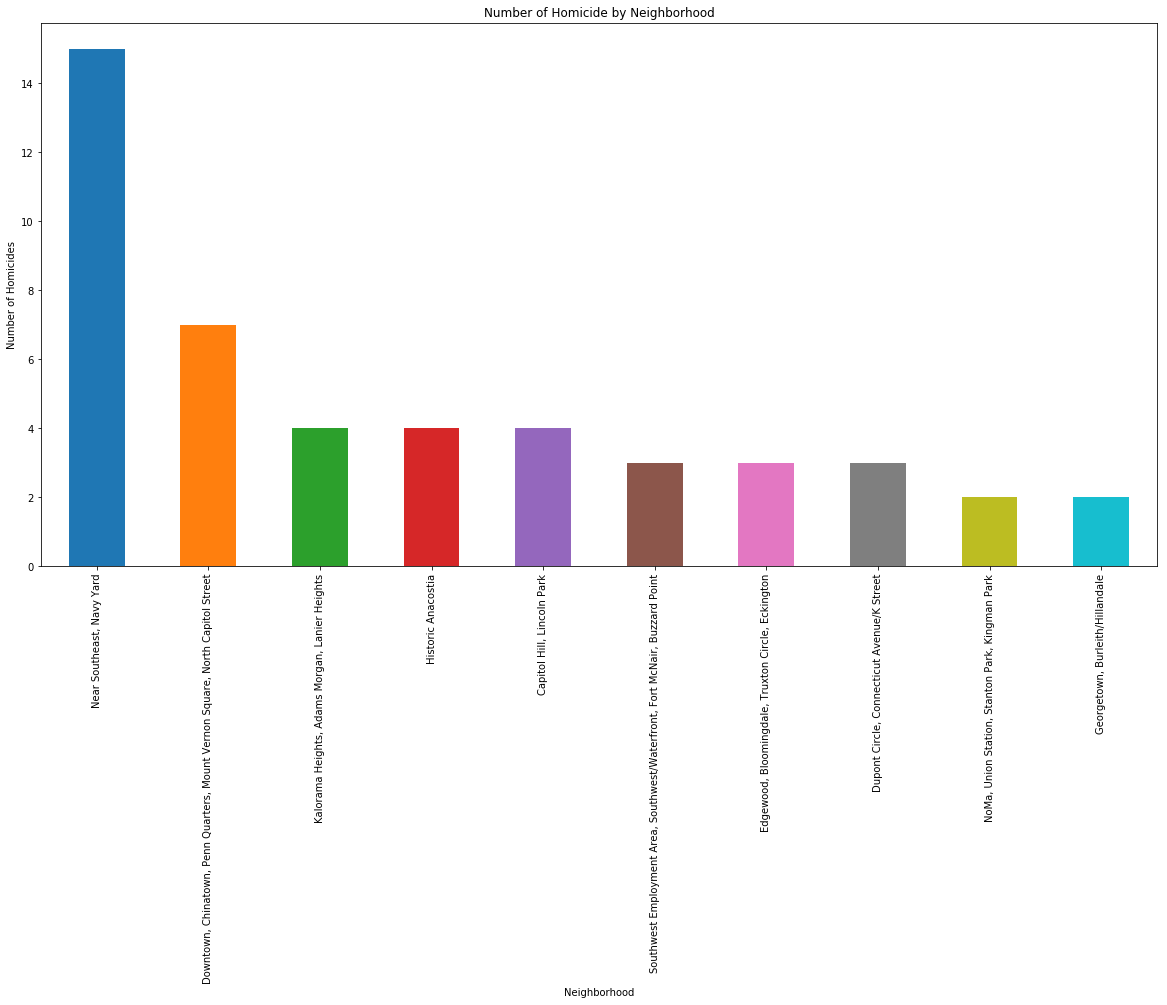

In [23]:
# Display a bar chart for the neighborhoods by offense type(homicide)
width=0.50
plt.rcParams['figure.figsize']=(20,10)
homicide=grouped_crime_homicide_df.plot(kind="bar", title="Number of Homicide by Neighborhood")
homicide.set_xlabel("Neighborhood")
homicide.set_ylabel("Number of Homicides")
homicide.plot(figsize=(100,50))
plt.show

<function matplotlib.pyplot.show>

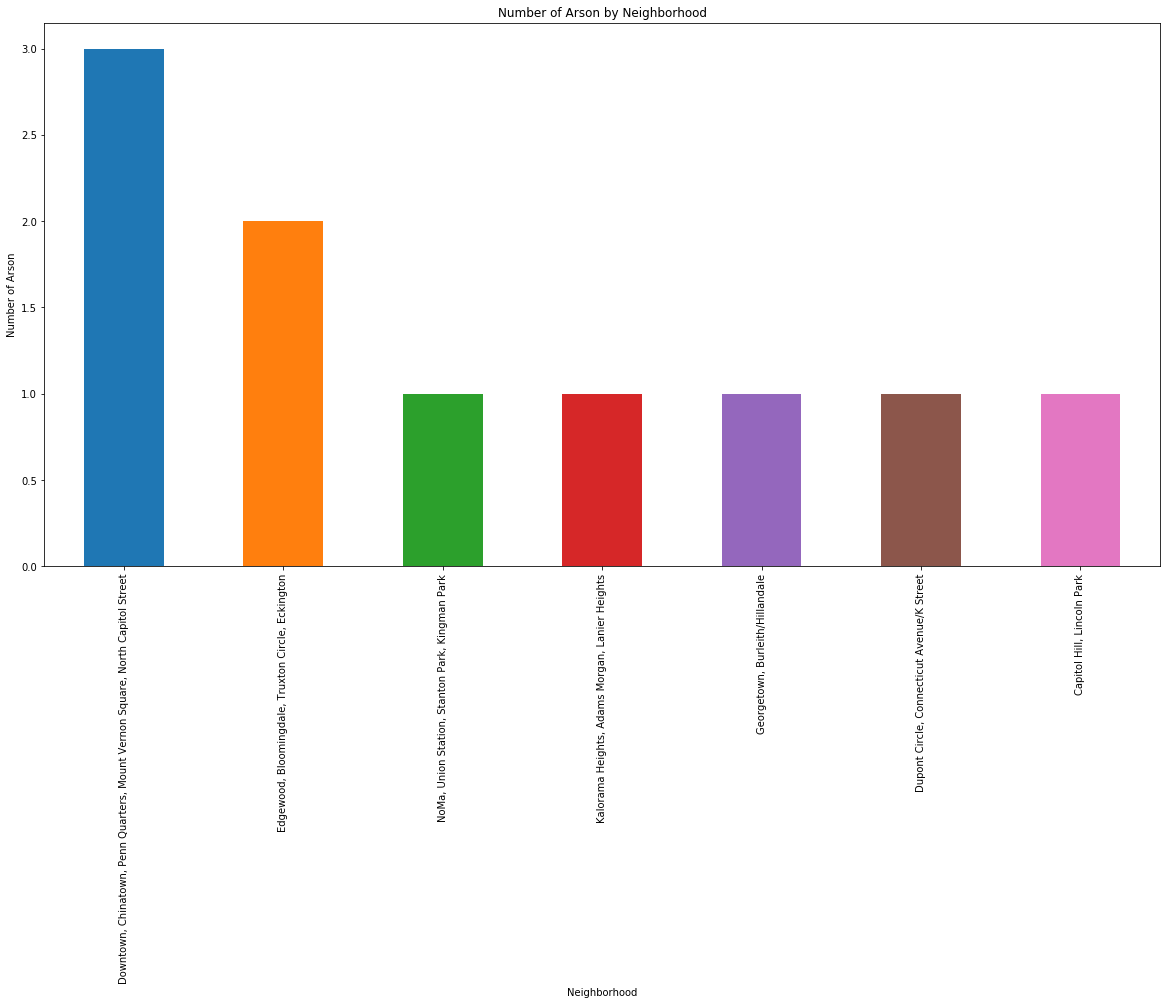

In [24]:
# Display a bar chart for the neighborhoods by offense type(arson)
width=0.50
plt.rcParams['figure.figsize']=(20,10)
arson=grouped_crime_arson_df.plot(kind="bar", title="Number of Arson by Neighborhood")
arson.set_xlabel("Neighborhood")
arson.set_ylabel("Number of Arson")
arson.plot(figsize=(100,50))
plt.show


<function matplotlib.pyplot.show>

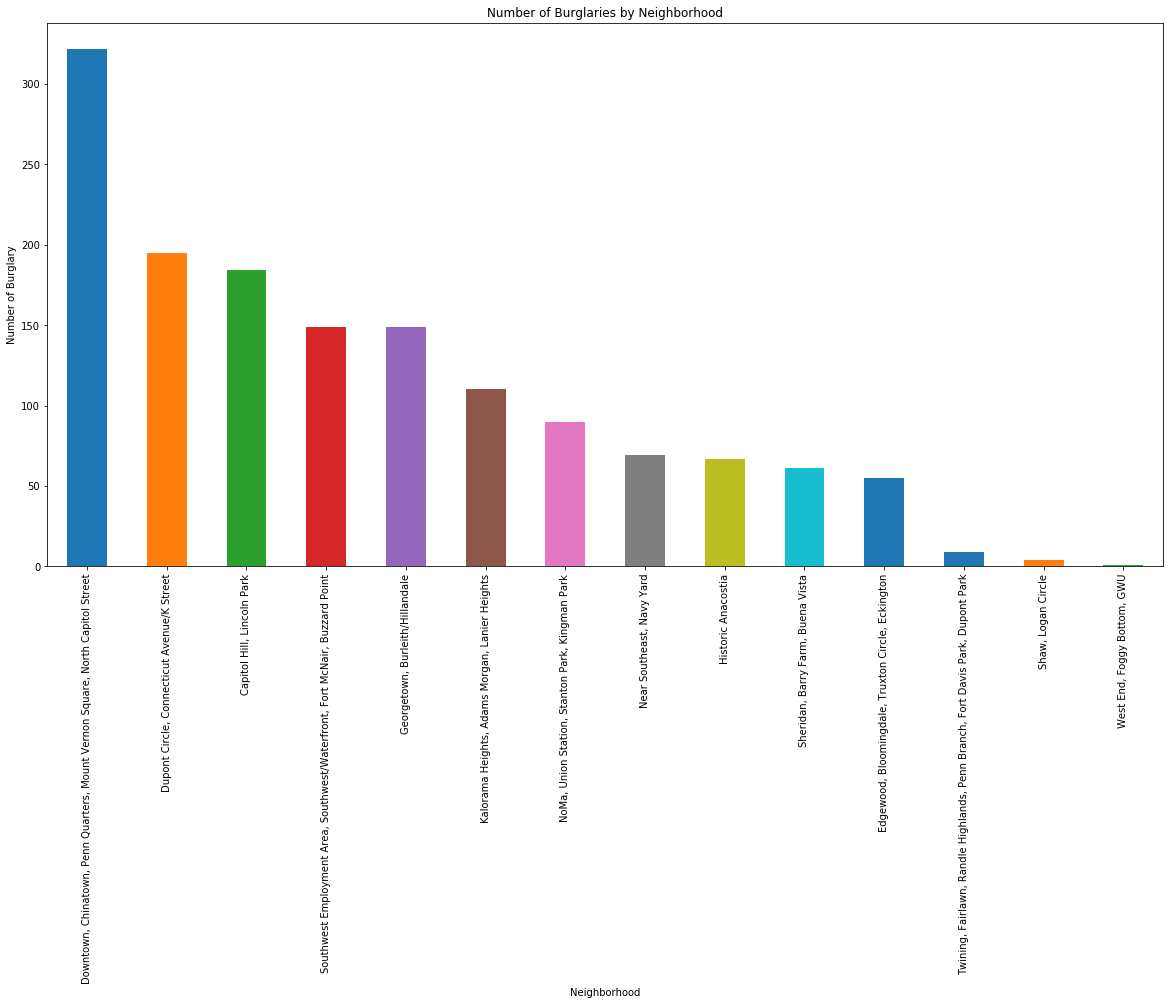

In [25]:
# Display a bar chart for the neighborhoods by offense type(burglary)
width=0.50
plt.rcParams['figure.figsize']=(20,10)
burglary=grouped_crime_burglary_df.plot(kind="bar", title="Number of Burglaries by Neighborhood")
burglary.set_xlabel("Neighborhood")
burglary.set_ylabel("Number of Burglary")
burglary.plot(figsize=(100,50))
plt.show

<function matplotlib.pyplot.show>

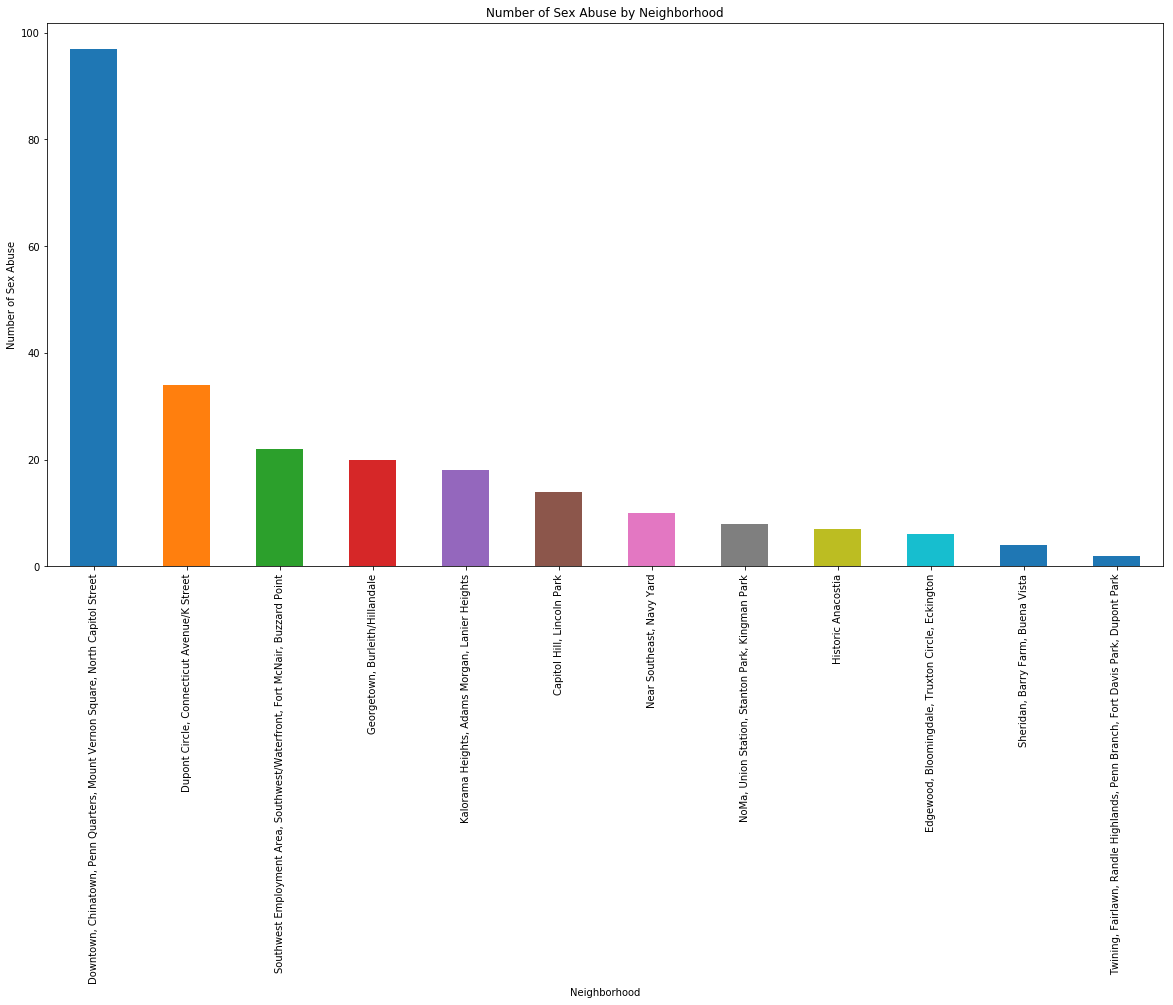

In [26]:
# Display a bar chart for the neighborhoods by offense type(sex abuse)
width=0.50
plt.rcParams['figure.figsize']=(20,10)
sexabuse=grouped_crime_sexabuse_df.plot(kind="bar", title="Number of Sex Abuse by Neighborhood")
sexabuse.set_xlabel("Neighborhood")
sexabuse.set_ylabel("Number of Sex Abuse")
sexabuse.plot(figsize=(100,50))
plt.show

<function matplotlib.pyplot.show>

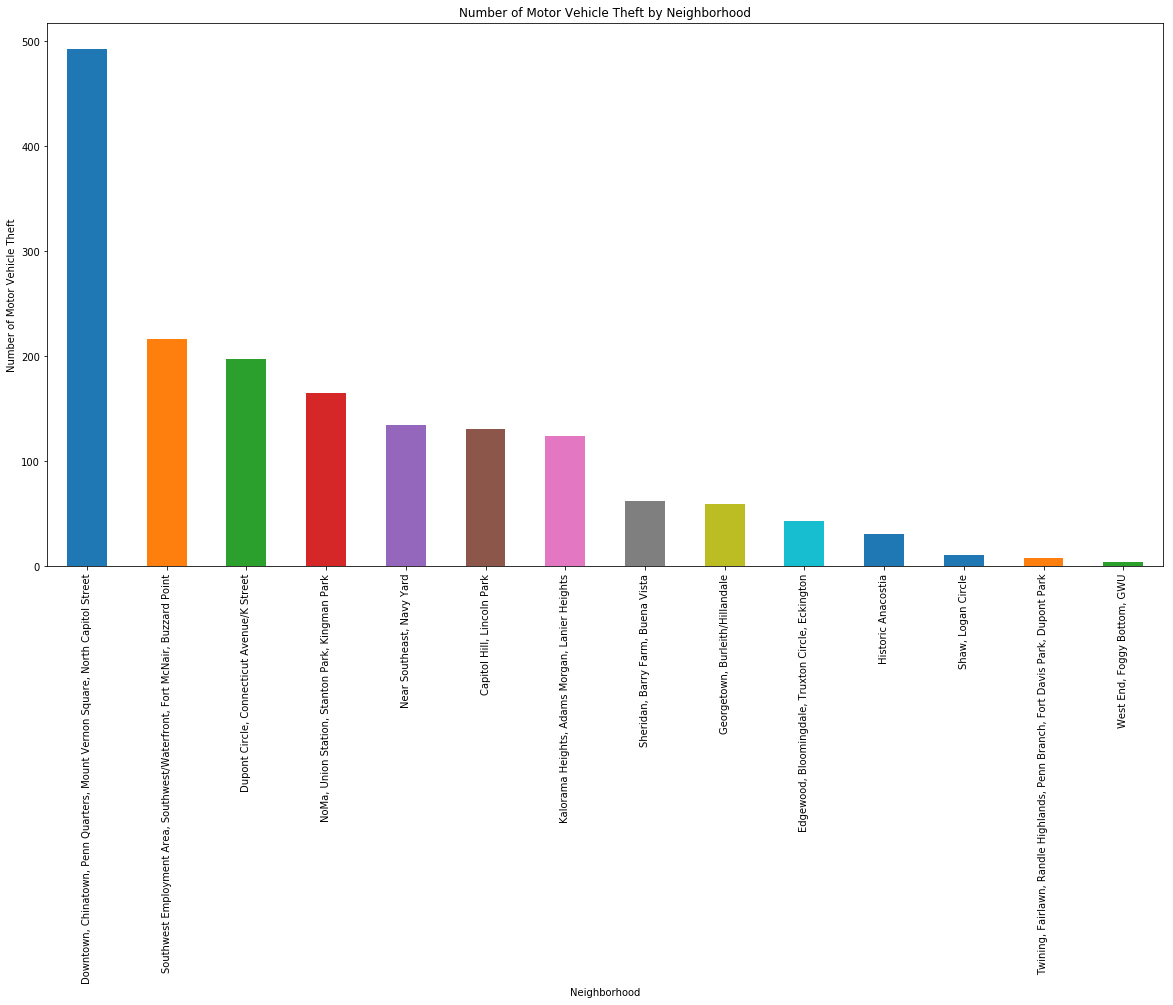

In [27]:
# Display a bar chart for the neighborhoods by offense type(motor vehicle theft)
width=0.50
plt.rcParams['figure.figsize']=(20,10)
vehicletheft=grouped_crime_vehicletheft_df.plot(kind="bar", title="Number of Motor Vehicle Theft by Neighborhood")
vehicletheft.set_xlabel("Neighborhood")
vehicletheft.set_ylabel("Number of Motor Vehicle Theft")
vehicletheft.plot(figsize=(100,50))
plt.show

<function matplotlib.pyplot.show>

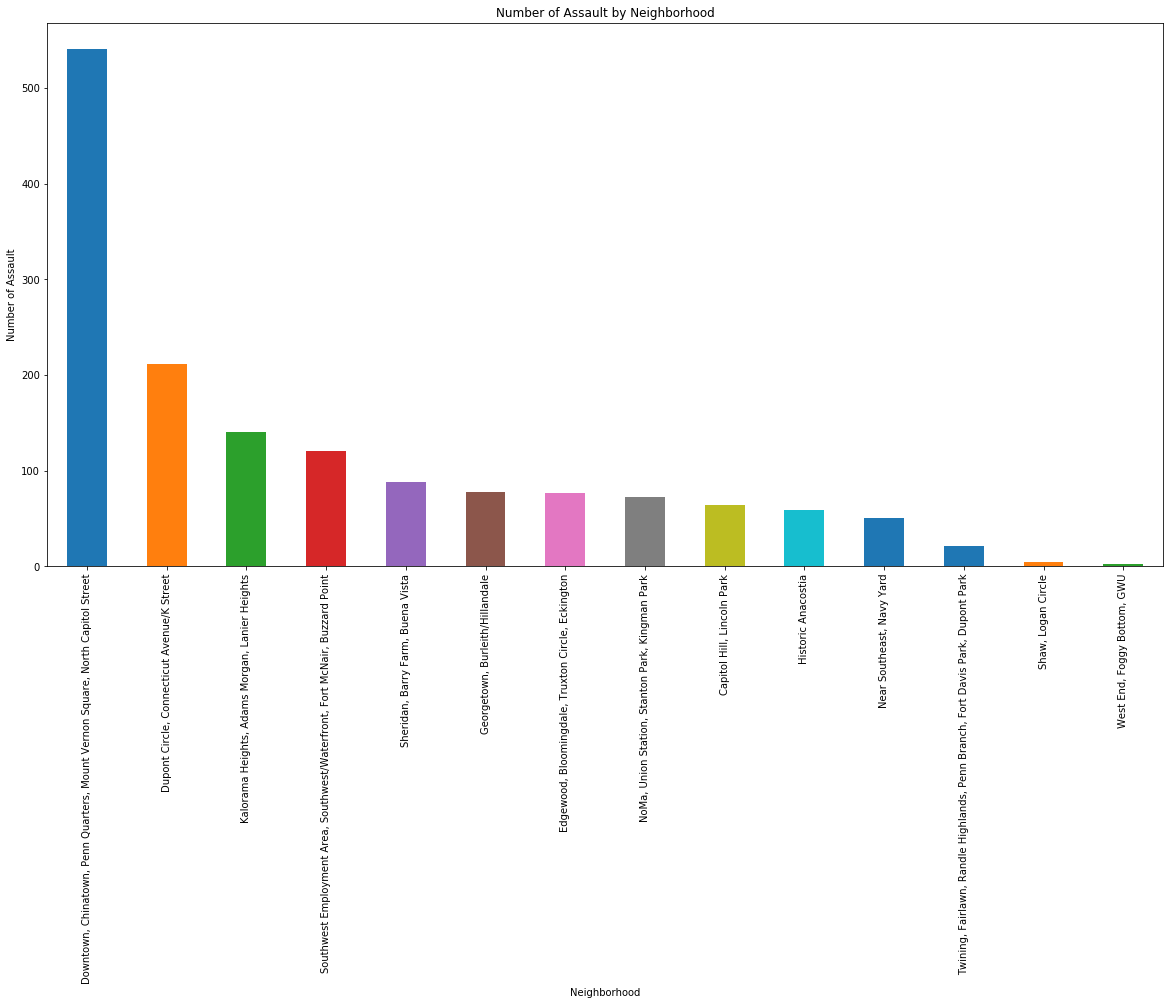

In [28]:
# Display a bar chart for the neighborhoods by offense type(assault with dangerous weapon)
width=0.50
plt.rcParams['figure.figsize']=(20,10)
assault=grouped_crime_assault_df.plot(kind="bar", title="Number of Assault by Neighborhood")
assault.set_xlabel("Neighborhood")
assault.set_ylabel("Number of Assault")
assault.plot(figsize=(100,50))
plt.show

<function matplotlib.pyplot.show>

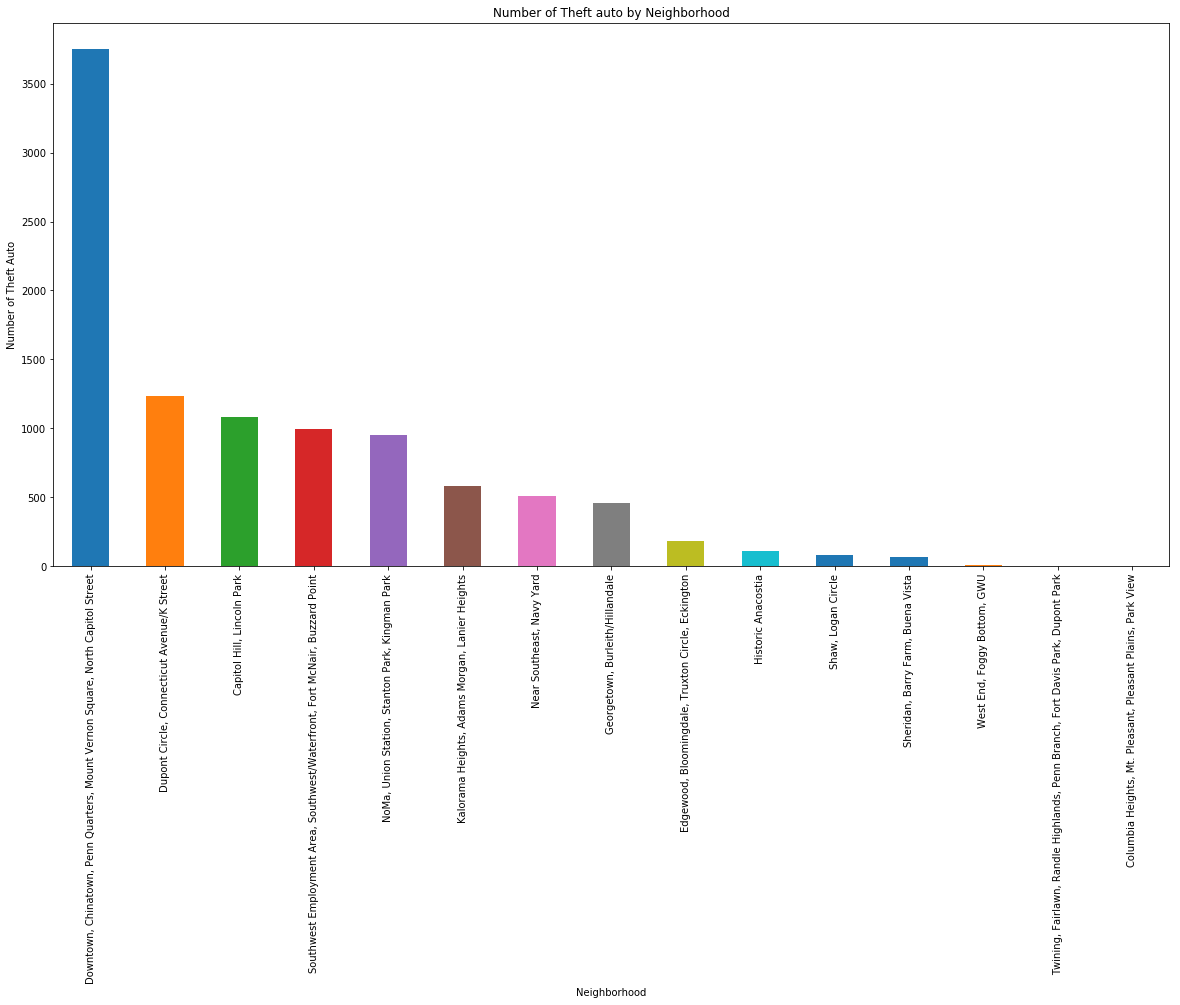

In [29]:
# Display a bar chart for the neighborhoods by offense type(theft auto)
width=0.50
plt.rcParams['figure.figsize']=(20,10)
theftauto=grouped_crime_theftauto_df.plot(kind="bar", title="Number of Theft auto by Neighborhood")
theftauto.set_xlabel("Neighborhood")
theftauto.set_ylabel("Number of Theft Auto")
theftauto.plot(figsize=(100,50))
plt.show

<function matplotlib.pyplot.show>

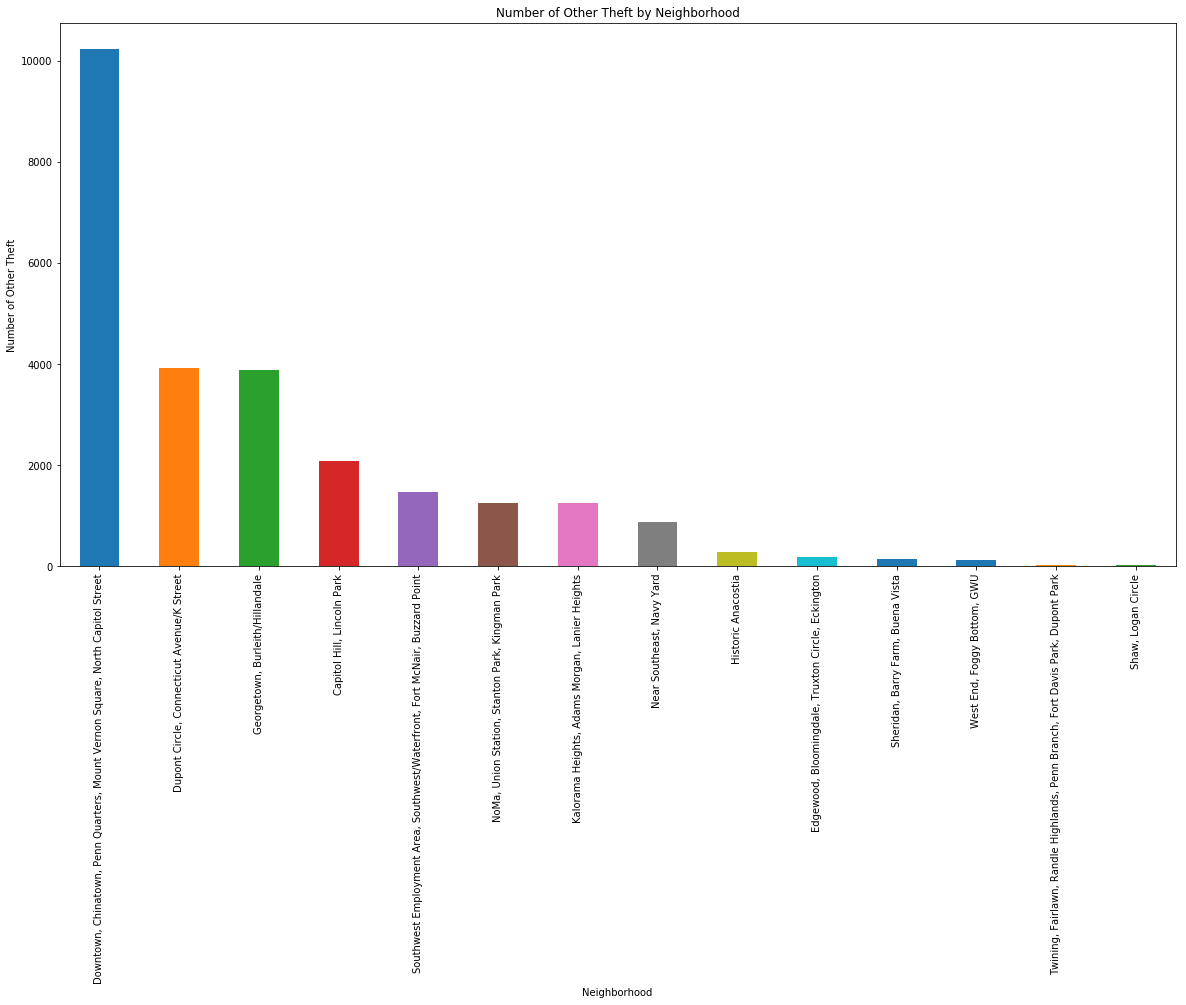

In [30]:
# Display a bar chart for the neighborhoods by offense type(other theft)
width=0.50
plt.rcParams['figure.figsize']=(20,10)
theftother=grouped_crime_theftother_df.plot(kind="bar", title="Number of Other Theft by Neighborhood")
theftother.set_xlabel("Neighborhood")
theftother.set_ylabel("Number of Other Theft")
theftother.plot(figsize=(100,50))
plt.show

In [31]:
crime_robbery_df.head()

,NEIGHBORHOOD,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
20,"Downtown, Chinatown, Penn Quarters, Mount Vern...",5800.0,violent,-77.022431,2015-06-10T13:50:00.000,robbery,day,136884.960000,1.0,2.0,...,398054.210000,700 - 799 block of h street nw,2015-06-10T13:00:00.000,15086313,robbery,2C,2015-06-10T17:50:00.000Z,others,"38.899822390384138,-77.022433674780757",38.899815
261,"NoMa, Union Station, Stanton Park, Kingman Park",10600.0,violent,-77.002709,2015-07-04T14:48:00.000,robbery,day,137802.000000,5.0,6.0,...,399765.000000,200 - 299 block of florida avenue ne,2015-07-04T13:00:00.000,15100855,robbery,6C,2015-07-04T18:49:00.000Z,knife,"38.908085534082026,-77.002711717000949",38.908078
309,"Downtown, Chinatown, Penn Quarters, Mount Vern...",5800.0,violent,-77.023482,2015-12-07T11:00:44.000,robbery,day,136595.000000,1.0,2.0,...,397963.000000,800 - 899 block of f street nw,2015-12-07T10:57:17.000,15194917,robbery,2C,2015-12-07T18:23:49.000Z,others,"38.897210118959592,-77.023484298810217",38.897202
484,"Dupont Circle, Connecticut Avenue/K Street",10700.0,violent,-77.041673,2015-04-11T19:03:00.000,robbery,evening,137321.656253,2.0,2.0,...,396385.312507,18th street nw and l street nw,2015-04-11T19:00:00.000,15051585,robbery,2B,2015-04-12T19:08:00.000Z,others,"38.903751027215037,-77.041675299503751",38.903743
753,"Downtown, Chinatown, Penn Quarters, Mount Vern...",5800.0,violent,-77.023979,2015-04-30T17:35:00.000,robbery,evening,136943.000000,1.0,2.0,...,397920.000000,800 - 899 block of 9th street nw,2015-04-30T17:30:00.000,15061770,robbery,2C,2015-04-30T21:49:00.000Z,others,"38.900344928208455,-77.023981045731944",38.900337


In [32]:
#Display a heatmap of robberies
locations = crime_robbery_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig


Figure(layout=FigureLayout(height='420px'))

In [33]:
#Display a heatmap of homicide
locations = crime_homicide_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [34]:
#Display a heatmap of other theft
locations = crime_theftother_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
#Display a heat map of assault
locations = crime_assault_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
#Display a heatmap of burglary
locations = crime_burglary_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
#Display a heatmap of theft from auto
locations = crime_theftauto_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
#Display a heatmap of motor vehicle theft
locations = crime_vehicletheft_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
#Display a heatmap of arson
locations = crime_arson_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
#Display a heatmap of sex abuse
locations = crime_sexabuse_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))